### Simulations

A total of **64 2d wave simulations** with varying significant wave height (*Hs*) and peak period (*Tp*) have been conducted using my own implementation of [HOSim](https://github.com/VegardBaa/HOSim).

> *HOSim is a numerical wave simulation tool based on the High-Order Spectral (HOS) method. It allows for efficient simulation of nonlinear wave fields with customizable sea state parameters.*

The repository functions similarly to HOS-Ocean and is used here for simulating highly nonlinear wave fields. All training and evaluation data in this project have been generated using this tool, which has taken considerable time to develop and validate.

---

### Predictable Zone

The setup for this machine learning experiment involves a **3000-meter-long spatial domain** and **15 minutes of simulation** of highly nonlinear waves (Hs from 2.5-7.0m and Tp from 10-12s). The specific case used is illustrated in the figure below.

The predictable zone is defined based on a continuous measurement of the wave field over a duration of **T = 60 seconds**, within the spatial interval **x = 0 to x<sub>max</sub> = 2000 meters**.

As seen in the figure, using this measurement it becomes possible to make a prediction in the region **x = 2000 to 2700 meters** after a delay of approximately **140 seconds**. This defines the prediction task used in the machine learning setup.


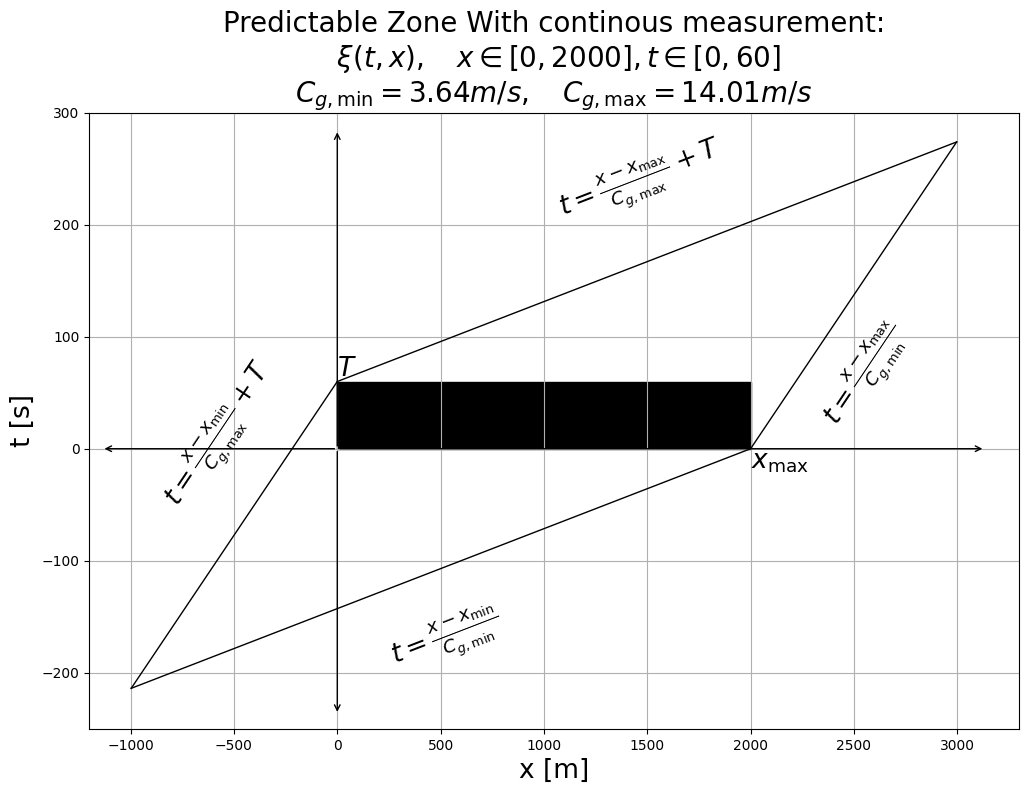

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

e_min = 0
e_max = 2000

c_min = 3.64
c_max = 14.01

T = 60

x_min = -1200
x_max = 3300
y_min = -250
y_max = 300

fontsize = 19

x1 = (e_min*c_max - c_min*e_max) / (c_max - c_min) - T * (c_max * c_min) / (c_max - c_min)
t1 = (x1 - e_max) / c_max

x2 = (e_max*c_max - c_min*e_min) / (c_max - c_min) + T * (c_max * c_min) / (c_max - c_min)
t2 = (x2 - e_max) / c_min

points_x = [T, t2, 0, t1, T]
points_y = [e_min, x2, e_max, x1, e_min]

box_x = [T, T, 0, 0] #T]
box_y = [e_min, e_max, e_max, e_min] #, e_min]

equations = [
    fr"$t=\frac{{x - x_{{\max}}}}{{c_{{g,\min}}}}$", 
    r"eq2", 
    r"eq3", 
    r"eq4"
]

equations = [
    fr"$t=\frac{{x - x_{{\max}}}}{{C_{{g,\max}}}} + T$",
    fr"$t = \frac{{x - x_{{\max}}}}{{C_{{g,\min}}}}$", 
    fr"$t = \frac{{x - x_{{\min}}}}{{C_{{g,\min}}}}$", 
    fr"$t=\frac{{x - x_{{\min}}}}{{C_{{g,\max}}}} + T$"
]

fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

ax = plt.gca()
transform = ax.transData.transform

for index in range(len(points_x)-1):
    x0, x1 = points_y[index], points_y[index+1]   # matplotlib x-coords
    y0, y1 = points_x[index], points_x[index+1]

    xm = (x0 + x1) / 2
    ym = (y0 + y1) / 2

    # compute angle in degrees for text rotation
    (x0_disp, y0_disp) = transform((x0, y0))
    (x1_disp, y1_disp) = transform((x1, y1))
    angle = np.degrees(np.arctan2(y1_disp - y0_disp, x1_disp - x0_disp))+[0, 180, 180, 0][index]

    # place the equation string
    plt.text(xm, ym, ["", "\n", "\n", ""][index] + equations[index]+["\n", "", "", "\n"][index],
             rotation=angle,
             ha="center", va=["bottom", "top", "top", "bottom"][index],
             fontsize=fontsize)

    plt.plot([x0, x1], [y0, y1], color="k", linewidth=1)
    # plt.plot(box_y[index:index+2], box_x[index:index+2], color="k", linewidth=1)

plt.fill(box_y, box_x, color="k", linewidth=1)

plt.grid()
plt.title("Predictable Zone With continous measurement:\n" + fr" $\xi (t, x), \quad x \in [0, 2000], t \in [0, 60]$" + "\n" + fr"$C_{{g,\min}}={c_min:.2f}m/s, \quad C_{{g,\max}}={c_max:.2f}m/s$", fontsize=20)
plt.ylabel("t [s]", fontsize=fontsize)
plt.xlabel("x [m]", fontsize=fontsize)


# ax.spines['top'].set_visible(False) 
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

plt.text(points_y[0], points_x[0], fr"$T$", ha="left", va="bottom", fontsize=fontsize)
plt.text(points_y[2], points_x[2], fr"$x_{{\max}}$", ha="left", va="top", fontsize=fontsize)
arrowOffset=10
ax.annotate('', xy=(x_max*0.95, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(0, y_max*0.95), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(x_min*0.95, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(0, y_min*0.95), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
plt.show()

# jupyter nbconvert ML_update.ipynb --to pdf --PDFExporter.preprocessors="['nbconvert.preprocessors.TagRemovePreprocessor']" --TagRemovePreprocessor.remove_input_tags="['hide_input']"